In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Town-wise-education - Karnataka.csv']


This kernel I will EDA on kernataka governement to better understand the education system in this state

In [4]:
df = pd.read_csv('../input/Town-wise-education - Karnataka.csv')

First let see overall view of the data

In [7]:
#we can look at the top 5 words
df.head()

,Table Name,State Code,District Code,Town Code,Total/ Rural/ Urban,Area Name,Age-Group,Total - Persons,Total - Males,Total - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational Level - Literate without Educational Level Persons,Educational Level - Literate without Educational Level Males,Educational Level - Literate without Educational Level Females,Educational Level - Below Primary Persons,Educational Level - Below Primary Males,Educational Level - Below Primary Females,Educational Level - Primary Persons,Educational Level - Primary Males,Educational Level - Primary Females,Educational Level - Middle Persons,Educational Level - Middle Males,Educational Level - Middle Females,Educational Level - Matric/Secondary Persons,Educational Level - Matric/Secondary Males,Educational Level - Matric/Secondary Females,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Males,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Females,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Graduate & Above Persons,Educational Level - Graduate & Above Males,Educational Level - Graduate & Above Females,Unclassified - Persons,Unclassified - Males,Unclassified - Females
0,C2308,29,1,40117000,Urban,Belgaum (M Corp.),All ages,399653,204598,195055,91358,36857,54501,308295,167741,140554,3510,1821,1689,50022,25892,24130,69598,34031,35567,29442,15986,13456,74529,39027,35502,31525,18275,13250,1371,1009,362,7143,5210,1933,41152,26488,14664,3,2,1
1,C2308,29,1,40117000,Urban,Belgaum (M Corp.),0-6,47642,24768,22874,47642,24768,22874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,C2308,29,1,40117000,Urban,Belgaum (M Corp.),7,6759,3495,3264,1375,662,713,5384,2833,2551,48,28,20,5336,2805,2531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,C2308,29,1,40117000,Urban,Belgaum (M Corp.),8,8067,4152,3915,568,292,276,7499,3860,3639,15,11,4,7484,3849,3635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,C2308,29,1,40117000,Urban,Belgaum (M Corp.),9,6948,3559,3389,275,137,138,6673,3422,3251,11,4,7,6291,3235,3056,371,183,188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#provides the statics of numerical data like (count,mean,max etc..)
df.describe()

,State Code,District Code,Town Code,Total - Persons,Total - Males,Total - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational Level - Literate without Educational Level Persons,Educational Level - Literate without Educational Level Males,Educational Level - Literate without Educational Level Females,Educational Level - Below Primary Persons,Educational Level - Below Primary Males,Educational Level - Below Primary Females,Educational Level - Primary Persons,Educational Level - Primary Males,Educational Level - Primary Females,Educational Level - Middle Persons,Educational Level - Middle Males,Educational Level - Middle Females,Educational Level - Matric/Secondary Persons,Educational Level - Matric/Secondary Males,Educational Level - Matric/Secondary Females,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Males,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Females,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Graduate & Above Persons,Educational Level - Graduate & Above Males,Educational Level - Graduate & Above Females,Unclassified - Persons,Unclassified - Males,Unclassified - Females
count,812.0,812.000000,8.120000e+02,8.120000e+02,8.120000e+02,8.120000e+02,8.120000e+02,812.000000,812.000000,8.120000e+02,8.120000e+02,8.120000e+02,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,29.0,15.035714,4.150982e+07,2.750764e+04,1.422253e+04,1.328511e+04,7.275195e+03,3113.495074,4161.699507,2.023245e+04,1.110903e+04,9.123414e+03,222.815271,116.926108,105.889163,3026.500000,1552.482759,1474.017241,4419.667488,2211.697044,2207.970443,2352.687192,1239.633005,1113.054187,4589.071429,2519.426108,2069.645320,1982.330049,1104.770936,877.559113,113.911330,87.391626,26.519704,482.088670,371.315271,110.773399,3043.322660,1905.359606,1137.963054,0.054187,0.032020,0.022167
std,0.0,6.714906,6.718245e+05,1.640983e+05,8.543287e+04,7.867390e+04,4.341504e+04,19577.631904,23934.190637,1.242060e+05,6.798408e+04,5.623801e+04,1423.660022,737.500726,686.664953,16657.164918,8565.671068,8093.347409,24555.900008,12290.317825,12268.475460,14616.730895,7589.470779,7030.964568,29706.334432,16232.342533,13481.837934,12429.201584,6720.924734,5717.439588,977.313511,740.415426,239.305779,3034.946141,2344.507666,693.711738,22771.068866,13770.026347,9031.484770,0.429515,0.279085,0.220975
min,29.0,1.000000,4.011700e+07,5.000000e+01,2.300000e+01,2.700000e+01,2.300000e+01,8.000000,15.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.0,11.250000,4.112700e+07,2.916000e+03,1.466750e+03,1.425250e+03,2.950000e+02,121.000000,158.500000,2.213500e+03,1.199750e+03,9.930000e+02,13.000000,7.000000,5.750000,183.500000,96.750000,81.750000,294.000000,167.000000,138.000000,28.750000,19.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000

1.0

In [12]:
#gives column wise information like type of the colum and counts.. we can see except type of area, area name, age-group, table name all are numeric fields only
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 46 columns):
Table Name                                                                                   812 non-null object
State Code                                                                                   812 non-null int64
District Code                                                                                812 non-null int64
Town Code                                                                                    812 non-null int64
Total/ Rural/ Urban                                                                          812 non-null object
Area Name                                                                                    812 non-null object
Age-Group                                                                                    812 non-null object
Total - Persons                                                                              812 non-null i

In [13]:
#lets plot some graphs with categarical features first, i will be using seaborn

In [15]:
import seaborn as sns
import numpy as np

In [17]:
df_cate = df.select_dtypes(include=np.object)

In [18]:
df_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 4 columns):
Table Name             812 non-null object
Total/ Rural/ Urban    812 non-null object
Area Name              812 non-null object
Age-Group              812 non-null object
dtypes: object(4)
memory usage: 25.5+ KB


In [30]:
#find out how many unique values present in the each categorical columns
for columns in df_cate.columns:
    #df_cate[columns].value_counts()
    print('unique values for {} colums is {}'.format(columns,df_cate[columns].unique()))

unique values for Table Name colums is ['C2308']
unique values for Total/ Rural/ Urban colums is ['Urban']
unique values for Area Name colums is ['Belgaum (M Corp.)' 'Bijapur (CMC)' 'Gulbarga (M Corp.)' 'Bidar (CMC)'
 'Raichur (CMC)' 'Gadag-Betigeri (CMC)' 'Hubli-Dharwad (M Corp.)'
 'Hospet (CMC)' 'Bellary (CMC)' 'Chitradurga (CMC)' 'Davanagere (CMC)'
 'Shimoga (CMC)' 'Bhadravati (CMC)' 'Udupi (CMC)' 'Chikmagalur (CMC)'
 'Tumkur (CMC)' 'Kolar (CMC)' 'Robertson Pet (CMC)' 'Dasarahalli (CMC)'
 'Byatarayanapura (CMC)' 'Bangalore (M Corp.)' 'Krishnarajapura (CMC)'
 'Mahadevapura (CMC)' 'Bommanahalli (CMC)' 'Mandya (CMC)' 'Hassan (CMC)'
 'Mangalore (M Corp.)' 'Mysore (M Corp.)']
unique values for Age-Group colums is ['All ages' '0-6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16' '17' '18'
 '19' '20-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59'
 '60-64' '65-69' '70-74' '75-79' '80+' 'Age not stated']


1. Table Name and type of area : colums has only one and i dont think it will add any weightage at the time of building model
2. we can do much analysis on Area name and Age - Group columns.


In [34]:
for columns in ['Area Name','Age-Group']:
    print('values counts of each value in the {} columns is {}'.format(columns,df_cate[columns].value_counts()))

values counts of each value in the Area Name columns is Dasarahalli (CMC)          29
Kolar (CMC)                29
Chitradurga (CMC)          29
Bijapur (CMC)              29
Mysore (M Corp.)           29
Mandya (CMC)               29
Bommanahalli (CMC)         29
Gulbarga (M Corp.)         29
Krishnarajapura (CMC)      29
Shimoga (CMC)              29
Hassan (CMC)               29
Belgaum (M Corp.)          29
Byatarayanapura (CMC)      29
Tumkur (CMC)               29
Raichur (CMC)              29
Bellary (CMC)              29
Hospet (CMC)               29
Gadag-Betigeri (CMC)       29
Bidar (CMC)                29
Mangalore (M Corp.)        29
Udupi (CMC)                29
Bangalore (M Corp.)        29
Mahadevapura (CMC)         29
Davanagere (CMC)           29
Chikmagalur (CMC)          29
Bhadravati (CMC)           29
Hubli-Dharwad (M Corp.)    29
Robertson Pet (CMC)        29
Name: Area Name, dtype: int64
values counts of each value in the Age-Group columns is All ages          

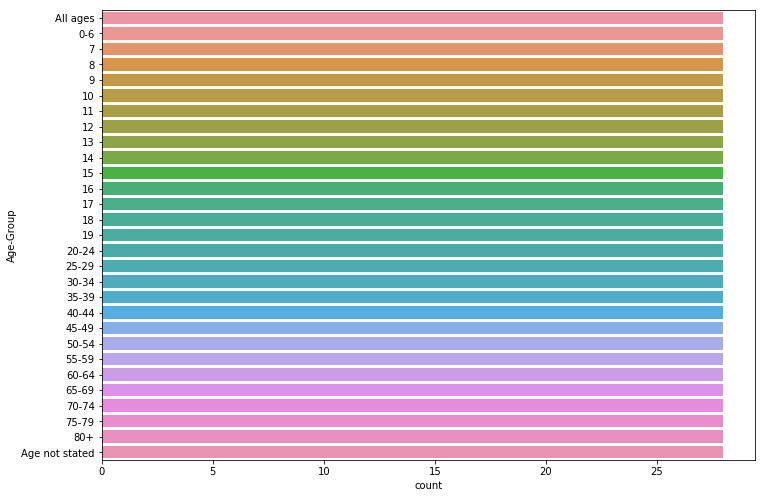

In [54]:
from matplotlib import pyplot
a4_dims = (11.7, 8.27)
#df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(y=df_cate['Age-Group'],ax=ax)

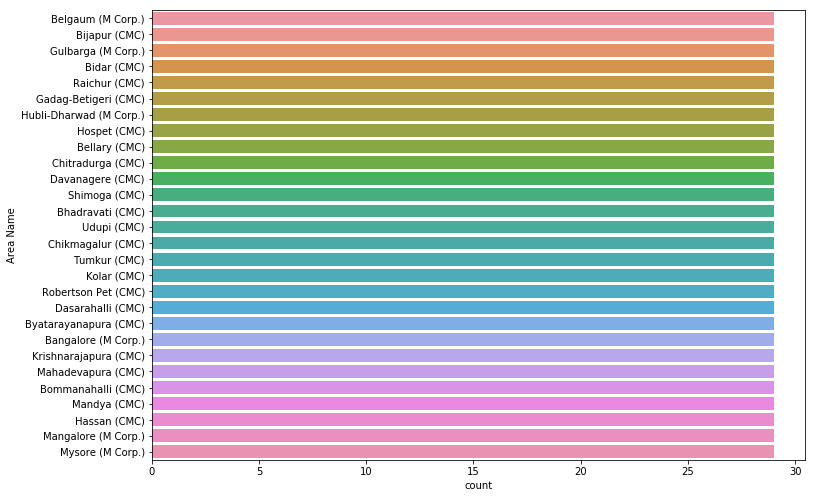

In [58]:
a4_dims = (11.7, 8.27)
#df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(y=df_cate['Area Name'],ax=ax)

In [59]:
#we can see both column values are distributed eaqually in the above figures

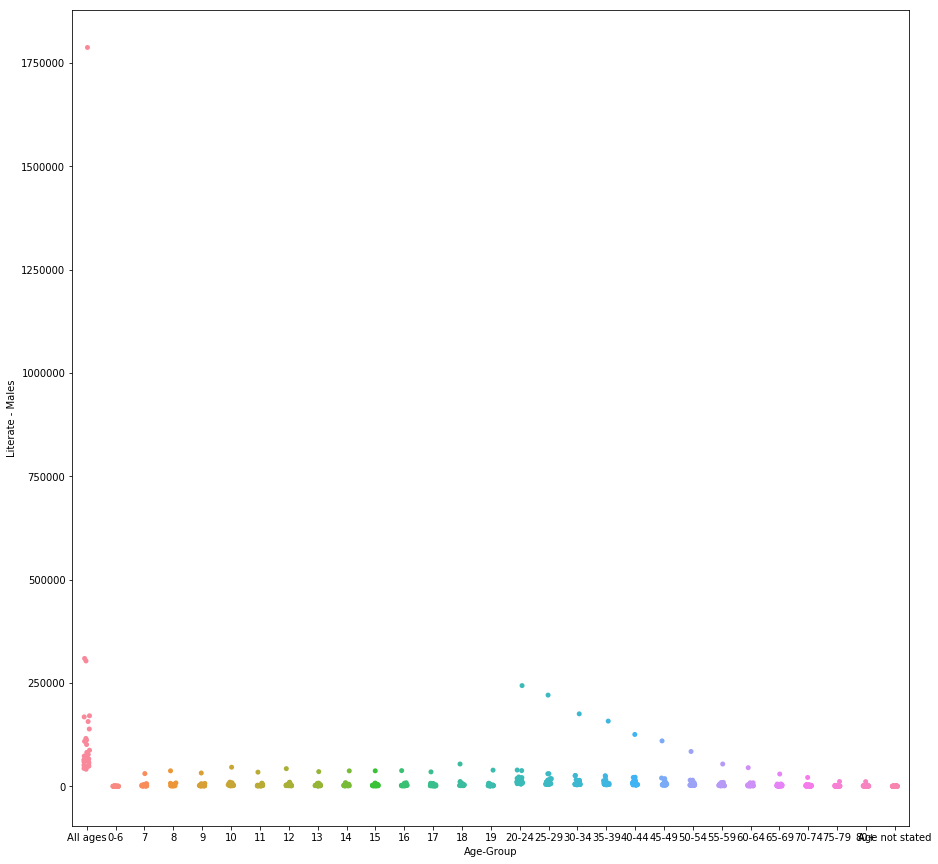

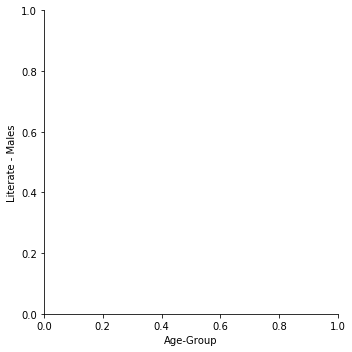

In [103]:
a4_dims = (15, 15)
#df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.catplot(x='Age-Group',y='Literate - Males',data=df,ax=ax)
#from belowe we can say most number of literature people fall under group of 20 - 45

In [64]:
df['Total - Persons']

0      399653
1       47642
2        6759
3        8067
4        6948
5        9586
6        7315
7        9326
8        7360
9        7983
10       7378
11       7911
12       7040
13      10793
14       7375
15      41883
16      36419
17      30618
18      29827
19      24878
20      22454
21      18151
22      12127
23      11332
24       7856
25       5789
26       2998
27       3317
28        521
29     228175
        ...  
782       462
783    755379
784     82990
785     13543
786     15111
787     13000
788     17253
789     12916
790     17057
791     14415
792     15460
793     14630
794     15571
795     14323
796     21508
797     14874
798     80404
799     70750
800     58982
801     60340
802     47573
803     42954
804     32492
805     21680
806     20761
807     13904
808     10754
809      5359
810      6236
811       539
Name: Total - Persons, Length: 812, dtype: int64

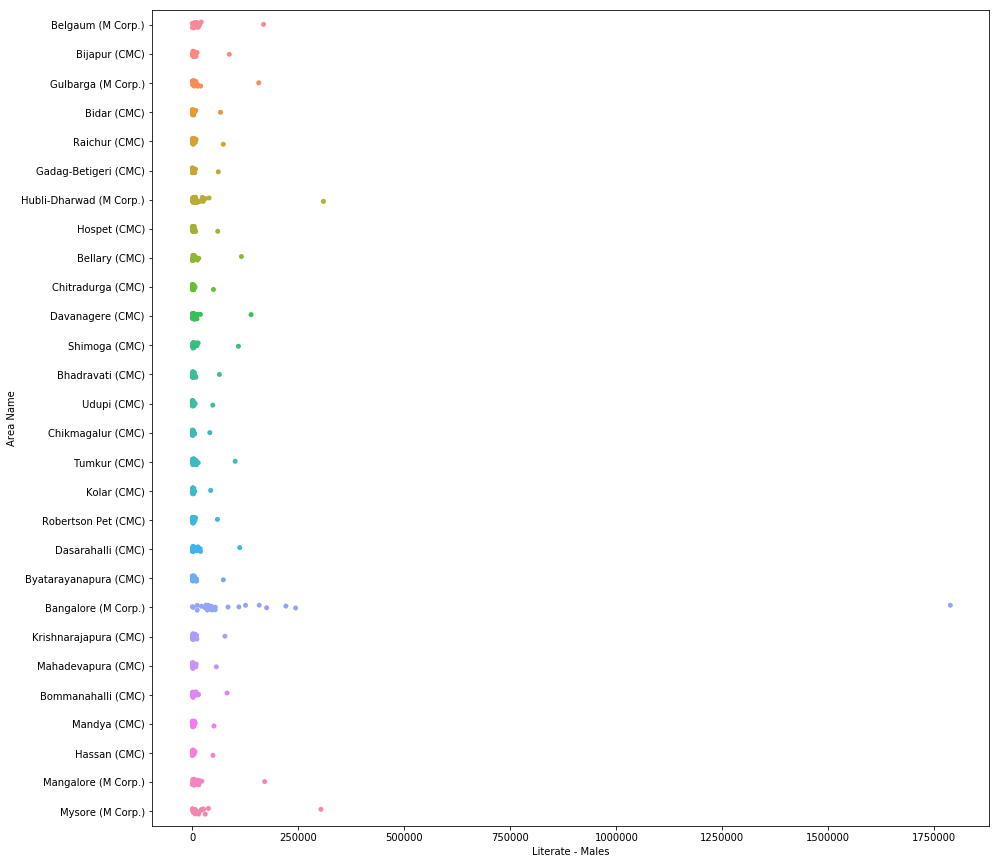

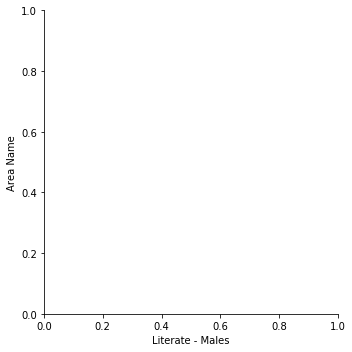

In [104]:
a4_dims = (15, 15)
#df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.catplot(y='Area Name',x='Literate - Males',data=df,ax=ax)
#we can say bangalore is having most number of literature peoples, lets go indepth of this part

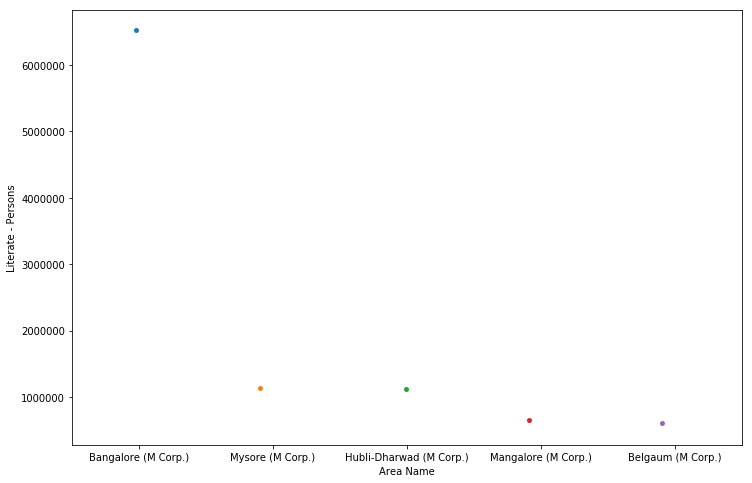

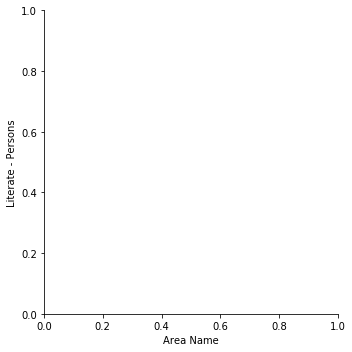

In [108]:
df_temp = df.groupby(['Area Name']).sum()['Literate - Persons'].sort_values(ascending=False).reset_index()
#print(df_temp.info())
a4_dims = (12, 8)
#df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.catplot(x = 'Area Name',y='Literate - Persons',data=df_temp[:5],ax=ax)
#we can see bangalore is having most number of literates amound the top 5 areas

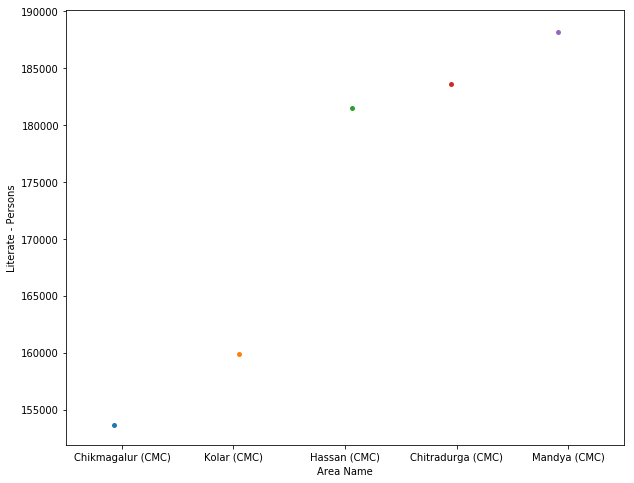

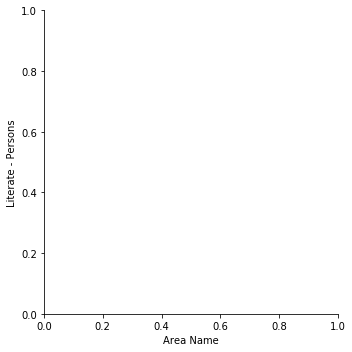

In [107]:
df_temp_true = df_temp.sort_values(by=['Literate - Persons'],ascending=True)
a4_dims = (10, 8)
#df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.catplot(x = 'Area Name',y='Literate - Persons',data=df_temp_true[:5],ax=ax)
#we can see chikmagalur is having least number of literates amound least 5 areas

#Lets analysis on illiterate peopls

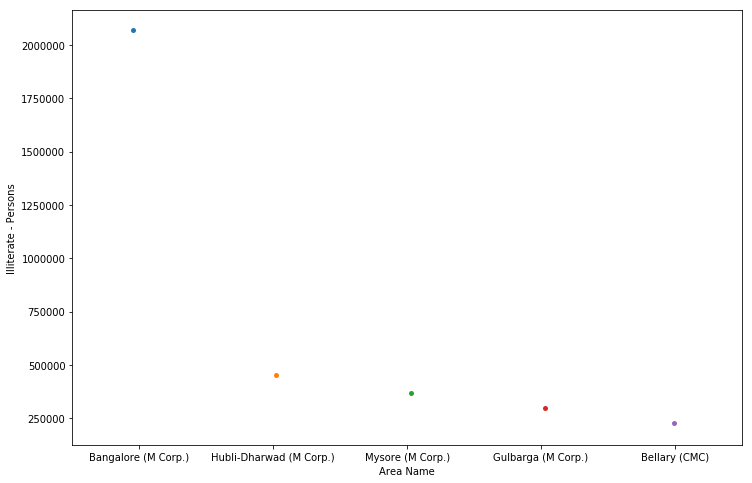

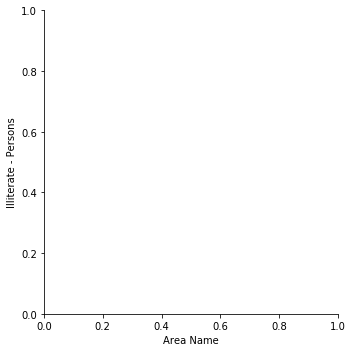

In [110]:
df_temp = df.groupby(['Area Name']).sum()['Illiterate - Persons'].sort_values(ascending=False).reset_index()
#print(df_temp.info())
a4_dims = (12, 8)
#df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.catplot(x = 'Area Name',y='Illiterate - Persons',data=df_temp[:5],ax=ax)
#we can see bangalore is having most number of literates amound the top 5 areas

# As it's getting really difficult to understand which area has least literature peoples, we calculate % of and plot graphs on it


In [137]:
df['Literate - Persons'].sum()/df['Total - Persons'].sum()
df_temp = df.groupby(['Area Name']).sum()['Illiterate - Persons'].sort_values(ascending=False)
df_temp = df.groupby(['Area Name']).sum()
df_temp['illiterate_percentage'] = df_temp.apply(lambda x:x['Illiterate - Persons']/x['Total - Persons'],axis=1)


In [147]:
df_temp = df_temp.sort_values(by=['illiterate_percentage'],ascending=False)
df_temp.index

Index(['Raichur (CMC)', 'Hospet (CMC)', 'Bellary (CMC)', 'Gulbarga (M Corp.)',
       'Bijapur (CMC)', 'Bidar (CMC)', 'Davanagere (CMC)', 'Kolar (CMC)',
       'Bommanahalli (CMC)', 'Gadag-Betigeri (CMC)', 'Hubli-Dharwad (M Corp.)',
       'Mandya (CMC)', 'Byatarayanapura (CMC)', 'Mahadevapura (CMC)',
       'Dasarahalli (CMC)', 'Bhadravati (CMC)', 'Shimoga (CMC)',
       'Tumkur (CMC)', 'Krishnarajapura (CMC)', 'Chitradurga (CMC)',
       'Mysore (M Corp.)', 'Chikmagalur (CMC)', 'Bangalore (M Corp.)',
       'Belgaum (M Corp.)', 'Hassan (CMC)', 'Robertson Pet (CMC)',
       'Mangalore (M Corp.)', 'Udupi (CMC)'],
      dtype='object', name='Area Name')

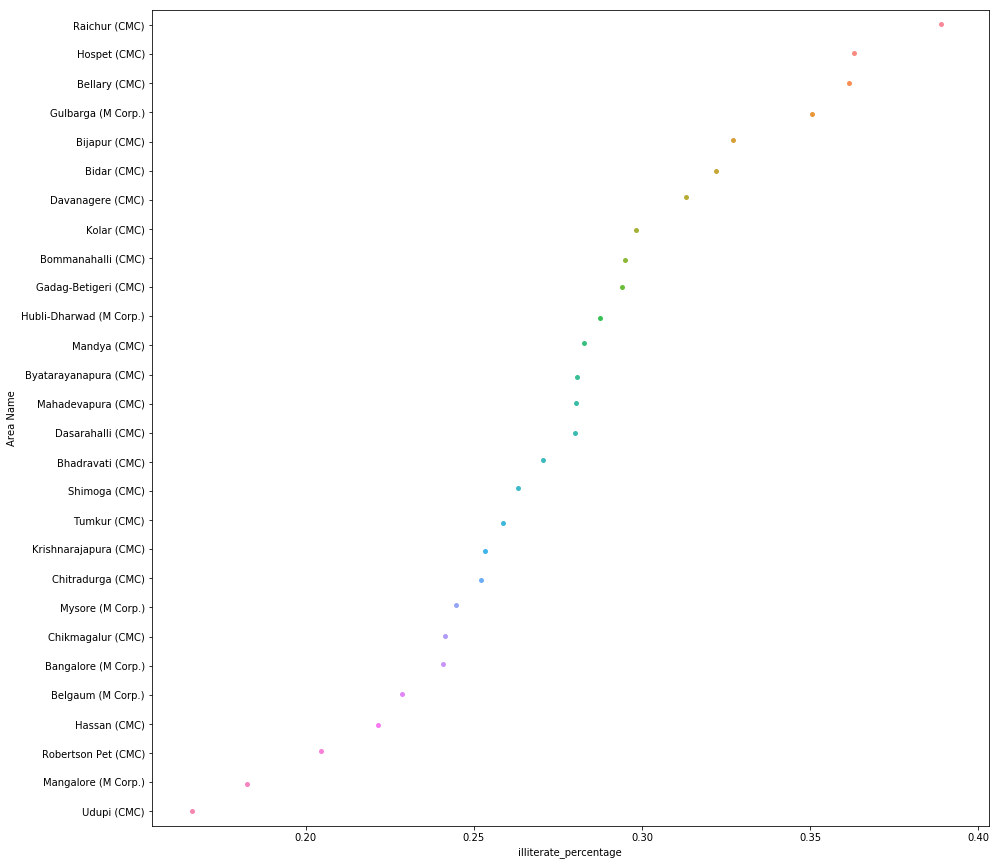

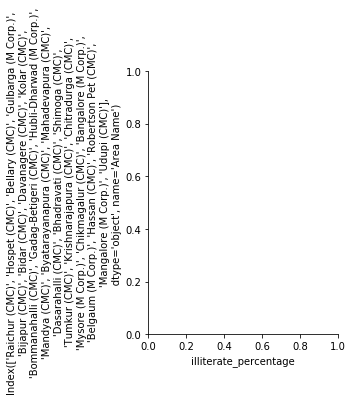

In [151]:
df_temp['illiterate_percentage']
a4_dims = (15, 15)
#df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.catplot(x='illiterate_percentage',y=df_temp.index,data=df_temp,ax=ax)
#graph showing % of illiterate people area wise
# Raichur is having most number of illterate people, and udupi is having least number of illterate people

In [152]:
#Thats it as of now, we will do more analysis later